In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
# from parse_levels import find_levels_in_configs, find_levels_in_configs_glob
# from parse_levels import process_metrics, human_train_time_dict, convert_to_dict, compute_gap_in_percentage, compute_gap_in_percentage_list, convert_to_dict_multiple_runs
# from parse_levels import filter_folder_info
import pandas as pd
import matplotlib.ticker as ticker
from plot_utils import plot_gap_comparison, gather_metrics
import re
import copy
import seaborn as sns
import json

In [2]:
import importlib
import parse_levels
importlib.reload(parse_levels)
from parse_levels import find_levels_in_configs, find_levels_in_configs_glob
from parse_levels import process_metrics, human_train_time_dict, convert_to_dict, compute_gap_in_percentage, compute_gap_in_percentage_list, convert_to_dict_multiple_runs
from parse_levels import filter_folder_info


In [3]:
# for each item in the dict, if any two have the same 'record', remove the one with lower number of steps in metric
# def deduplicate_metrics(search_results):
#     records_length_so_far = {}
#     new_search_results = {}
#     for key, value in search_results.items():
#         if value['record'] not in records_length_so_far:
#             records_length_so_far[value['record']] = (len(value['metrics']['step']), key)
#             new_search_results[key] = value
#         else:
#             if len(value['metrics']['step']) > records_length_so_far[value['record']][0]:
#                 new_search_results.pop(records_length_so_far[value['record']][1])

#                 records_length_so_far[value['record']] = (len(value['metrics']['step']), key)
#                 new_search_results[key] = value
#     return new_search_results


In [4]:
# ori_results = find_levels_in_configs_glob(
#     [
#         '/checkpoint/maui/zhaobc/scientist/workspace/record_*',
#     ]
# )
# with open('/checkpoint/maui/zhaobc/scientist/code_analysis_with_all_versions_knowledge_o3_mini.json', 'r') as f:
#     o3_results = json.load(f)


In [5]:
# with open('may8.cache', 'w') as f:
#     json.dump(ori_results, f)

In [6]:
with open('/home/zhaobc/scientist/plot/june1.cache', 'r') as f:
    ori_results = json.load(f)

In [7]:
# z_folder_info = filter_folder_info(ori_results, [('levels', 'z')])
unique_levels = set()
for key, value in ori_results.items():
    unique_levels.add(value['levels'][0])
unique_levels

{1, 12, 125, 129, 19, 2, 5, 'z'}

In [8]:
# 1 is psuedo-code
# 2 is text description
# 5 is paper like
# 9 is adhoc knowledge, we can ignore it for now
# 'z' is zero knowledge

In [9]:
folder_info = ori_results
# o3_results

In [10]:
len(folder_info)

5409

In [11]:
# flat search -- n_initial_hypotheses = 50
flat_params = [
    ('runner', 'bon'),
    # ('n_initial_hypotheses', 50),
    ('n_iterations', 1),
]
# tree search -- n_initial_hypotheses = 1, n_hypotheses = 3
tree_params = [
    ('runner', 'bon'),
    ('n_initial_hypotheses', 1),
    ('n_hypotheses', 3),
]
# forest search -- n_initial_hypotheses = 3, n_hypotheses = 3
forest_params = [
    ('runner', 'bon'),
    ('n_initial_hypotheses', 3),
    ('n_hypotheses', 3),
]
# AIDE -- n_initial_hypotheses = 3, n_hypotheses = 1, debug_prob = 0.5
aide_params = [
    ('runner', 'aide'),
    ('n_initial_hypotheses', 3),
    ('n_hypotheses', 1),
    ('debug_prob', 0.5),
]
# MultiAIDE -- n_initial_hypotheses = 3, n_hypotheses = 3, debug_prob = 0.5
multi_aide_params = [
    ('runner', 'aide'),
    ('n_initial_hypotheses', 3),
    ('n_hypotheses', 3),
    ('debug_prob', 0.5),
]

search_algo_params = {
    'flat': flat_params,
    'tree': tree_params,
    'forest': forest_params,
    'ori_aide': aide_params,
    'multi_aide': multi_aide_params,
}

plot_info = {}

for search_algo, params in search_algo_params.items():
    plot_info[search_algo] = {}
    for level in ['z', 1, 2, 5, 12, 125]:
        plot_info[search_algo][level] = {}
        for model in ['deepseek-r1', 'o3-mini', 'gemini-2.5-pro']:
        # for model in ['o3-mini']:
            search_params = params + [('levels', level), ('model', model)]
            filtered_folder_info = filter_folder_info(folder_info, search_params)
            print(f'{search_algo} {level} {model} {len(filtered_folder_info)}')
            plot_info[search_algo][level][model] = filtered_folder_info


flat z deepseek-r1 29
flat z o3-mini 60
flat z gemini-2.5-pro 57
flat 1 deepseek-r1 31
flat 1 o3-mini 99
flat 1 gemini-2.5-pro 57
flat 2 deepseek-r1 29
flat 2 o3-mini 60
flat 2 gemini-2.5-pro 57
flat 5 deepseek-r1 60
flat 5 o3-mini 60
flat 5 gemini-2.5-pro 57
flat 12 deepseek-r1 71
flat 12 o3-mini 64
flat 12 gemini-2.5-pro 57
flat 125 deepseek-r1 75
flat 125 o3-mini 55
flat 125 gemini-2.5-pro 57
tree z deepseek-r1 29
tree z o3-mini 60
tree z gemini-2.5-pro 55
tree 1 deepseek-r1 27
tree 1 o3-mini 106
tree 1 gemini-2.5-pro 57
tree 2 deepseek-r1 29
tree 2 o3-mini 60
tree 2 gemini-2.5-pro 57
tree 5 deepseek-r1 60
tree 5 o3-mini 60
tree 5 gemini-2.5-pro 57
tree 12 deepseek-r1 58
tree 12 o3-mini 51
tree 12 gemini-2.5-pro 47
tree 125 deepseek-r1 75
tree 125 o3-mini 74
tree 125 gemini-2.5-pro 49
forest z deepseek-r1 29
forest z o3-mini 60
forest z gemini-2.5-pro 57
forest 1 deepseek-r1 27
forest 1 o3-mini 106
forest 1 gemini-2.5-pro 57
forest 2 deepseek-r1 29
forest 2 o3-mini 60
forest 2 gemin

In [12]:
# from tqdm import tqdm

# figure_data = {}
# for search_algo in search_algo_params.keys():
#     for level in ['z', 1, 2, 5, 12, 125]:
#         # for model in ['o3-mini']:
#         for model in ['deepseek-r1', 'o3-mini']:
#             # plot_info[search_algo][level][model] = deduplicate_metrics(plot_info[search_algo][level][model])
#             try:
#                 plot_info[search_algo][level][model] = process_metrics(plot_info[search_algo][level][model])
#                 figure_data[f'{search_algo}_{level}_{model}'] = convert_to_dict_multiple_runs(plot_info[search_algo][level][model], keep_name=True)
#             except FileNotFoundError as e:
#                 print(f"FileNotFoundError for {search_algo}, level {level}, model {model}: {e}")


In [13]:
# let's run for o3-mini only
figure_data_o3 = {}
for search_algo in search_algo_params.keys():
    for level in ['z', 1, 2, 5, 12, 125]:
        for model in ['o3-mini', 'deepseek-r1', 'gemini-2.5-pro']:
            try:
                plot_info[search_algo][level][model] = process_metrics(plot_info[search_algo][level][model])
                figure_data_o3[f'{search_algo}_{level}_{model}'] = convert_to_dict_multiple_runs(plot_info[search_algo][level][model], keep_name=True)
            except (FileNotFoundError, ValueError) as e:
                print(f"FileNotFoundError for {search_algo}, level {level}, model {model}: {e}")
len(plot_info)
plot_info.keys()

dict_keys(['flat', 'tree', 'forest', 'ori_aide', 'multi_aide'])

In [14]:
print(len(figure_data_o3))
figure_data_o3.keys()

90


dict_keys(['flat_z_o3-mini', 'flat_z_deepseek-r1', 'flat_z_gemini-2.5-pro', 'flat_1_o3-mini', 'flat_1_deepseek-r1', 'flat_1_gemini-2.5-pro', 'flat_2_o3-mini', 'flat_2_deepseek-r1', 'flat_2_gemini-2.5-pro', 'flat_5_o3-mini', 'flat_5_deepseek-r1', 'flat_5_gemini-2.5-pro', 'flat_12_o3-mini', 'flat_12_deepseek-r1', 'flat_12_gemini-2.5-pro', 'flat_125_o3-mini', 'flat_125_deepseek-r1', 'flat_125_gemini-2.5-pro', 'tree_z_o3-mini', 'tree_z_deepseek-r1', 'tree_z_gemini-2.5-pro', 'tree_1_o3-mini', 'tree_1_deepseek-r1', 'tree_1_gemini-2.5-pro', 'tree_2_o3-mini', 'tree_2_deepseek-r1', 'tree_2_gemini-2.5-pro', 'tree_5_o3-mini', 'tree_5_deepseek-r1', 'tree_5_gemini-2.5-pro', 'tree_12_o3-mini', 'tree_12_deepseek-r1', 'tree_12_gemini-2.5-pro', 'tree_125_o3-mini', 'tree_125_deepseek-r1', 'tree_125_gemini-2.5-pro', 'forest_z_o3-mini', 'forest_z_deepseek-r1', 'forest_z_gemini-2.5-pro', 'forest_1_o3-mini', 'forest_1_deepseek-r1', 'forest_1_gemini-2.5-pro', 'forest_2_o3-mini', 'forest_2_deepseek-r1', 'fore

In [15]:
print(len(plot_info))
plot_info.keys()

5


dict_keys(['flat', 'tree', 'forest', 'ori_aide', 'multi_aide'])

In [16]:
human_train_time_dict = {
    1: 2968348,
    2: 2209926,
    3: 1386147,
    4: 1301740,
    5: 949528,
    6: 766259,
    7: 773072,
    8: 662205,
    9: 505531,
    10: 477150,
    11: 442985,
    12: 317839,
    13: 289805,
    14: 273107,
    15: 241463,
    16: 232971,
    17: 220374,
    18: 211840,
    19: 199442,
    20: 188680,
    21: 184262
}


In [17]:
figure_data_percent = {}
for key in figure_data_o3.keys():
    print(key)
    figure_data_percent[key] = compute_gap_in_percentage_list(figure_data_o3[key], human_train_time_dict, keep_name=True)
    figure_data_percent[key] = {str(k): v for k, v in figure_data_percent[key].items()}
    try:
        del figure_data_percent[key]['6']
    except:
        pass

flat_z_o3-mini
flat_z_deepseek-r1
flat_z_gemini-2.5-pro
flat_1_o3-mini
flat_1_deepseek-r1
flat_1_gemini-2.5-pro
flat_2_o3-mini
flat_2_deepseek-r1
flat_2_gemini-2.5-pro
flat_5_o3-mini
flat_5_deepseek-r1
flat_5_gemini-2.5-pro
flat_12_o3-mini
flat_12_deepseek-r1
flat_12_gemini-2.5-pro
flat_125_o3-mini
flat_125_deepseek-r1
flat_125_gemini-2.5-pro
tree_z_o3-mini
tree_z_deepseek-r1
tree_z_gemini-2.5-pro
tree_1_o3-mini
tree_1_deepseek-r1
tree_1_gemini-2.5-pro
tree_2_o3-mini
tree_2_deepseek-r1
tree_2_gemini-2.5-pro
tree_5_o3-mini
tree_5_deepseek-r1
tree_5_gemini-2.5-pro
tree_12_o3-mini
tree_12_deepseek-r1
tree_12_gemini-2.5-pro
tree_125_o3-mini
tree_125_deepseek-r1
tree_125_gemini-2.5-pro
forest_z_o3-mini
forest_z_deepseek-r1
forest_z_gemini-2.5-pro
forest_1_o3-mini
forest_1_deepseek-r1
forest_1_gemini-2.5-pro
forest_2_o3-mini
forest_2_deepseek-r1
forest_2_gemini-2.5-pro
forest_5_o3-mini
forest_5_deepseek-r1
forest_5_gemini-2.5-pro
forest_12_o3-mini
forest_12_deepseek-r1
forest_12_gemini-2.5-p

In [18]:
# Get top 3 values for each experiment, padding if needed
def get_top_3_values(arr, config=None, exp_name=None):
    if len(arr) == 0:
        return np.array([0, 0, 0])
    # Filter out values > 3 or < 0
    valid_arr = []
    for x in arr:
        if not (0 <= x <= 3):
            print(f"Warning: Value {x} from {config} {exp_name} outside valid range [0,3], replacing with 0")
            valid_arr.append(0)
        else:
            valid_arr.append(x)
    sorted_arr = np.sort(valid_arr)[::-1] # Sort descending
    if len(arr) >= 3:
        return sorted_arr[:3]
    else:
        # Pad with repeats of max value to get 3 numbers
        padding = 3 - len(arr)
        if not ('r1' in config):
            # Only log warning once per config
            if exp_name == list(figure_data_percent[config].keys())[0]:
                print(f"Warning: Config {config} has experiments with fewer than 3 values, padding with {padding} repeated values")
        return np.concatenate([sorted_arr, np.repeat(sorted_arr[-1], padding)])

# Process each config
results_by_config = {}
for config, experiments in figure_data_percent.items():
    print(f"Processing config: {config}")
    print(f"Experiments: {list(experiments.keys())}")
    # Get top 3 values for each experiment
    top3_by_experiment = {}
    if len(experiments) == 0:
        print(f'Warning: {config} has no experiments')
    for exp_name, values in experiments.items():
        print(f"Experiment Name: {exp_name}, Values: {values}")
        top3 = get_top_3_values(values, config, exp_name)
        top3_by_experiment[exp_name] = top3

    # Average across experiments for each of the 3 positions
    all_exp_values = np.array(list(top3_by_experiment.values()))
    mean_values = np.mean(all_exp_values, axis=0) # Shape (3,)

    # Calculate standard error of the mean (SEM) instead of std
    n = len(all_exp_values) if len(all_exp_values) > 0 else 1
    sem_value = np.std(mean_values) / np.sqrt(n)
    print("All experiment values (top 3 for each experiment):")
    print(all_exp_values)
    results_by_config[config] = {
        'means': np.mean(mean_values) if len(all_exp_values) > 0 else 0,
        'std': sem_value if len(all_exp_values) > 0 else 0,  # Using 'std' key for compatibility but storing SEM
        'all_exp_values': all_exp_values,
    }


Processing config: flat_z_o3-mini
Experiments: ['7', '13', '1', '3', '11', '19', '14', '16', '5', '17', '8', '10', '4', '18', '15', '9', '2', '12']
Experiment Name: 7, Values: [0.         0.21399515 0.05661739]
Experiment Name: 13, Values: [0.         0.01988262 0.10923464]
Experiment Name: 1, Values: [1.02706013 0.99684081 1.03018504]
Experiment Name: 3, Values: [0. 0. 0.]
Experiment Name: 11, Values: [0.         0.         0.05304205]
Experiment Name: 19, Values: [0. 0. 0.]
Experiment Name: 14, Values: [0. 0. 0.]
Experiment Name: 16, Values: [0.         0.         0.32730015]
Experiment Name: 5, Values: [0. 0. 0.]
Experiment Name: 17, Values: [0.         0.03960628 0.0314038 ]
Experiment Name: 8, Values: [0. 0. 0.]
Experiment Name: 10, Values: [0. 0. 0.]
Experiment Name: 4, Values: [0.05027654 0.         0.06461449]
Experiment Name: 18, Values: [0.26794644 0.         0.19011131]
Experiment Name: 15, Values: [0.16910033 0.13424399 0.10939708]
Experiment Name: 9, Values: [0.14428667 0.

In [19]:
results_by_config['flat_125_o3-mini']

{'means': 0.2364127923638016,
 'std': 0.044738941178733595,
 'all_exp_values': array([[0.28802437, 0.10885868, 0.        ],
        [1.04967179, 0.79376058, 0.        ],
        [0.74759847, 0.        , 0.        ],
        [1.00770493, 0.10829707, 0.        ],
        [0.98258844, 0.95944759, 0.        ],
        [0.11151036, 0.        , 0.        ],
        [0.25576706, 0.16776899, 0.        ],
        [0.26966557, 0.20654734, 0.        ],
        [0.25506073, 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [1.04188497, 0.98706278, 0.        ],
        [0.        , 0.        , 0.        ],
        [0.07543989, 0.        , 0.        ],
        [0.26390469, 0.25274934, 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.52657499, 0.        , 0.        ],
        [1.48972904, 0.81667313, 0.        ]])}

In [20]:
results_by_config['flat_125_o3-mini']['all_exp_values'].shape

(18, 3)

In [34]:
results_by_config_all_searches = {}

for hint_regime in ['z', '1', '2', '5', '12', '125']:
    combined_exp_values = []
    key_suffix = f"{hint_regime}_all_model"
    for model in ['deepseek-r1', 'o3-mini', 'gemini-2.5-pro']:
        # key_suffix = f"{hint_regime}_o3-mini"


        for search_method in ['flat', 'tree', 'forest', 'ori_aide', 'multi_aide']:
            key = f"{search_method}_{hint_regime}_{model}"
            if key in results_by_config:
                combined_exp_values.append(results_by_config[key]['all_exp_values'])

    # Combine all experiments across searches
    combined_exp_values = np.vstack(combined_exp_values)
    results_by_config_all_searches[f"{key_suffix}_all_searches"] = {
        'all_exp_values': combined_exp_values
    }

In [35]:
results_by_config_all_searches.keys()

dict_keys(['z_all_model_all_searches', '1_all_model_all_searches', '2_all_model_all_searches', '5_all_model_all_searches', '12_all_model_all_searches', '125_all_model_all_searches'])

In [36]:
results_by_config_all_searches['z_all_model_all_searches']['all_exp_values'].shape

(270, 3)

In [37]:
from rliable import library as rly
from rliable import metrics
from rliable import plot_utils

In [38]:
results_by_config_all_searches.keys()


dict_keys(['z_all_model_all_searches', '1_all_model_all_searches', '2_all_model_all_searches', '5_all_model_all_searches', '12_all_model_all_searches', '125_all_model_all_searches'])

In [39]:
from itertools import product

In [40]:
# algorithms = ['DQN (Nature)', 'DQN (Adam)', 'C51', 'REM', 'Rainbow',
#               'IQN', 'M-IQN', 'DreamerV2']
searches = [
  f'{level}_{model}_all_searches' for level, model in product(
    ['z', '1', '2', '5', '12', '125'],
    ['all_model']
    # ['deepseek-r1', 'o3-mini', 'gemini-2.5-pro']
  )
  # 'z_o3-mini_all_searches',
  # '1_o3-mini_all_searches',
  # '2_o3-mini_all_searches',
  # '5_o3-mini_all_searches',
  # '12_o3-mini_all_searches',
  # '125_o3-mini_all_searches'
  ]
# Load ALE scores as a dictionary mapping algorithms to their human normalize
# score matrices, each of which is of size `(num_runs x num_games)`.
# atari_200m_normalized_score_dict = ...
searches_fsr_all_exp_values_dict = {key: value['all_exp_values'] for key, value in results_by_config_all_searches.items()}
aggregate_func = lambda x: np.array([
  metrics.aggregate_median(x),
  metrics.aggregate_iqm(x),
  metrics.aggregate_mean(x),
  metrics.aggregate_optimality_gap(x)])

In [41]:
aggregate_scores_all_searches, aggregate_score_cis_all_searches = rly.get_interval_estimates(
  searches_fsr_all_exp_values_dict, aggregate_func, reps=50000)


INFO:absl:Calculating estimates for z_all_model_all_searches ...
INFO:absl:Calculating estimates for 1_all_model_all_searches ...
INFO:absl:Calculating estimates for 2_all_model_all_searches ...
INFO:absl:Calculating estimates for 5_all_model_all_searches ...
INFO:absl:Calculating estimates for 12_all_model_all_searches ...
INFO:absl:Calculating estimates for 125_all_model_all_searches ...


In [42]:
aggregate_scores_all_searches, aggregate_score_cis_all_searches

({'z_all_model_all_searches': array([0.11322902, 0.01701495, 0.12375394, 0.87694333]),
  '1_all_model_all_searches': array([0.23011089, 0.08565651, 0.24670662, 0.75630679]),
  '2_all_model_all_searches': array([0.12934455, 0.01326287, 0.14248459, 0.85932557]),
  '5_all_model_all_searches': array([0.1203887 , 0.00937337, 0.15835664, 0.84694326]),
  '12_all_model_all_searches': array([0.2313324 , 0.09274087, 0.25470974, 0.75493548]),
  '125_all_model_all_searches': array([0.3016831 , 0.15275945, 0.30075982, 0.70541959])},
 {'z_all_model_all_searches': array([[0.08796986, 0.01073536, 0.10721276, 0.85983977],
         [0.14315841, 0.02551559, 0.14103772, 0.89333969]]),
  '1_all_model_all_searches': array([[0.19050367, 0.06090072, 0.22279956, 0.73228113],
         [0.27225976, 0.11704716, 0.27118667, 0.77963664]]),
  '2_all_model_all_searches': array([[0.09968713, 0.00667564, 0.12499221, 0.84163571],
         [0.16046454, 0.02277979, 0.16073975, 0.87641471]]),
  '5_all_model_all_searches': 

In [43]:
def _decorate_axis(ax, wrect=10, hrect=10, ticklabelsize='large'):
  """Helper function for decorating plots."""
  # Hide the right and top spines
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_linewidth(2)
  ax.spines['bottom'].set_linewidth(2)
  # Deal with ticks and the blank space at the origin
  ax.tick_params(length=0.1, width=0.1, labelsize=ticklabelsize)
  ax.spines['left'].set_position(('outward', hrect))
  ax.spines['bottom'].set_position(('outward', wrect))
  return ax

In [44]:
def plot_interval_estimates(point_estimates,
                            interval_estimates,
                            metric_names,
                            algorithms=None,
                            colors=None,
                            color_palette='colorblind',
                            max_ticks=4,
                            subfigure_width=3.4,
                            row_height=0.37,
                            xlabel_y_coordinate=-0.1,
                            xlabel='Normalized Score',
                            **kwargs):
  """Plots various metrics with confidence intervals.

  Args:
    point_estimates: Dictionary mapping algorithm to a list or array of point
      estimates of the metrics to plot.
    interval_estimates: Dictionary mapping algorithms to interval estimates
      corresponding to the `point_estimates`. Typically, consists of stratified
      bootstrap CIs.
    metric_names: Names of the metrics corresponding to `point_estimates`.
    algorithms: List of methods used for plotting. If None, defaults to all the
      keys in `point_estimates`.
    colors: Maps each method to a color. If None, then this mapping is created
      based on `color_palette`.
    color_palette: `seaborn.color_palette` object for mapping each method to a
      color.
    max_ticks: Find nice tick locations with no more than `max_ticks`. Passed to
      `plt.MaxNLocator`.
    subfigure_width: Width of each subfigure.
    row_height: Height of each row in a subfigure.
    xlabel_y_coordinate: y-coordinate of the x-axis label.
    xlabel: Label for the x-axis.
    **kwargs: Arbitrary keyword arguments.

  Returns:
    fig: A matplotlib Figure.
    axes: `axes.Axes` or array of Axes.
  """

  if algorithms is None:
    algorithms = list(point_estimates.keys())
  num_metrics = len(point_estimates[algorithms[0]])
  figsize = (subfigure_width * num_metrics, row_height * len(algorithms))
  fig, axes = plt.subplots(nrows=1, ncols=num_metrics, figsize=figsize)
  if colors is None:
    color_palette = sns.color_palette(color_palette, n_colors=len(algorithms))
    colors = dict(zip(algorithms, color_palette))
  h = kwargs.pop('interval_height', 0.6)

  for idx, metric_name in enumerate(metric_names):
    for alg_idx, algorithm in enumerate(algorithms):
      ax = axes[idx] if num_metrics > 1 else axes
      # Plot interval estimates.
      lower, upper = interval_estimates[algorithm][:, idx]
      ax.barh(
          y=alg_idx,
          width=upper - lower,
          height=h,
          left=lower,
          color=colors[algorithm],
          alpha=0.75,
          label=algorithm)
      # Plot point estimates.
      ax.vlines(
          x=point_estimates[algorithm][idx],
          ymin=alg_idx - (7.5 * h / 16),
          ymax=alg_idx + (6 * h / 16),
          label=algorithm,
          color='k',
          alpha=0.5)

    ax.set_yticks(list(range(len(algorithms))))
    ax.xaxis.set_major_locator(plt.MaxNLocator(max_ticks))
    if idx != 0:
      ax.set_yticks([])
    else:
      ax.set_yticklabels(algorithms, fontsize='large')
    ax.set_title(metric_name, fontsize='large')
    ax.tick_params(axis='both', which='major')
    _decorate_axis(ax, ticklabelsize='large', wrect=5)
    ax.spines['left'].set_visible(False)
    ax.grid(True, axis='x', alpha=0.25)
  fig.text(0.4, xlabel_y_coordinate, xlabel, ha='center', fontsize='large')
  plt.subplots_adjust(wspace=kwargs.pop('wspace', 0.11), left=0.0)
  return fig, axes

In [45]:
def plot_interval_estimates(point_estimates,
                            interval_estimates,
                            metric_names,
                            algorithms=None,
                            colors=None,
                            color_palette='colorblind',
                            max_ticks=4,
                            subfigure_width=3.4,
                            row_height=0.37,
                            xlabel_y_coordinate=-0.1,
                            xlabel='Normalized Score',
                            legend_title=None,
                            legend_name=None,
                            **kwargs):
    if algorithms is None:
        algorithms = list(point_estimates.keys())
    num_metrics = len(point_estimates[algorithms[0]])
    figsize = (subfigure_width * num_metrics, row_height * len(algorithms))
    fig, axes = plt.subplots(nrows=1, ncols=num_metrics, figsize=figsize)
    if colors is None:
        color_palette = sns.color_palette(color_palette, n_colors=len(algorithms))
        colors = dict(zip(algorithms, color_palette))
    h = kwargs.pop('interval_height', 0.6)

    for idx, metric_name in enumerate(metric_names):
        for alg_idx, algorithm in enumerate(algorithms):
            ax = axes[idx] if num_metrics > 1 else axes
            # Plot interval estimates.
            lower, upper = interval_estimates[algorithm][:, idx]
            ax.barh(
                y=alg_idx,
                width=upper - lower,
                height=h,
                left=lower,
                color=colors[algorithm],
                alpha=0.75,
                label=algorithm)
            # Plot point estimates.
            ax.vlines(
                x=point_estimates[algorithm][idx],
                ymin=alg_idx - (7.5 * h / 16),
                ymax=alg_idx + (6 * h / 16),
                color='k',
                alpha=0.5)

        ax.set_yticks(list(range(len(algorithms))))
        ax.xaxis.set_major_locator(plt.MaxNLocator(max_ticks))
        ax.set_yticklabels([])  # Remove y-tick labels
        ax.set_title(metric_name, fontsize='large')
        ax.tick_params(axis='both', which='major')
        _decorate_axis(ax, ticklabelsize='large', wrect=5)
        ax.spines['left'].set_visible(False)
        ax.grid(True, axis='x', alpha=0.25)

    fig.text(0.4, xlabel_y_coordinate, xlabel, ha='center', fontsize='large')
    plt.subplots_adjust(wspace=kwargs.pop('wspace', 0.11), left=0.0)

    # Add legend to the figure
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, legend_name if legend_name is not None else algorithms, title=legend_title,
    bbox_to_anchor=(0.45, 1.50), loc='upper center', frameon=False, ncol=len(algorithms), fontsize='large')

    return fig, axes

In [46]:
# searches = ['z_o3-mini_all_searches', '1_o3-mini_all_searches', '2_o3-mini_all_searches', '5_o3-mini_all_searches', '12_o3-mini_all_searches', '125_o3-mini_all_searches']
searches = ['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 1 + 2', 'Level 1 + 2 + 3']
searches_replace = {
  'z_all_model_all_searches': 'Level 0',
  '1_all_model_all_searches': 'Level 1',
  '2_all_model_all_searches': 'Level 2',
  '5_all_model_all_searches': 'Level 3',
  '12_all_model_all_searches': 'Level 1 + 2',
  '125_all_model_all_searches': 'Level 1 + 2 + 3',
}
aggregate_scores_hints = {searches_replace[k]: v for k, v in aggregate_scores_all_searches.items()}
aggregate_score_cis_hints = {searches_replace[k]: v for k, v in aggregate_score_cis_all_searches.items()}

# fig, axes = plot_utils.plot_interval_estimates(
#   aggregate_scores_all_searches, aggregate_score_cis_all_searches,
#   metric_names=['Median', 'IQM', 'Mean', 'Optimality Gap'],
#   algorithms=searches, xlabel='FSR')

<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_1309374/2884428197.py:18: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('$\overline{FSR}$', labelpad=15, fontsize='large')  # Increase labelpad and fontsize


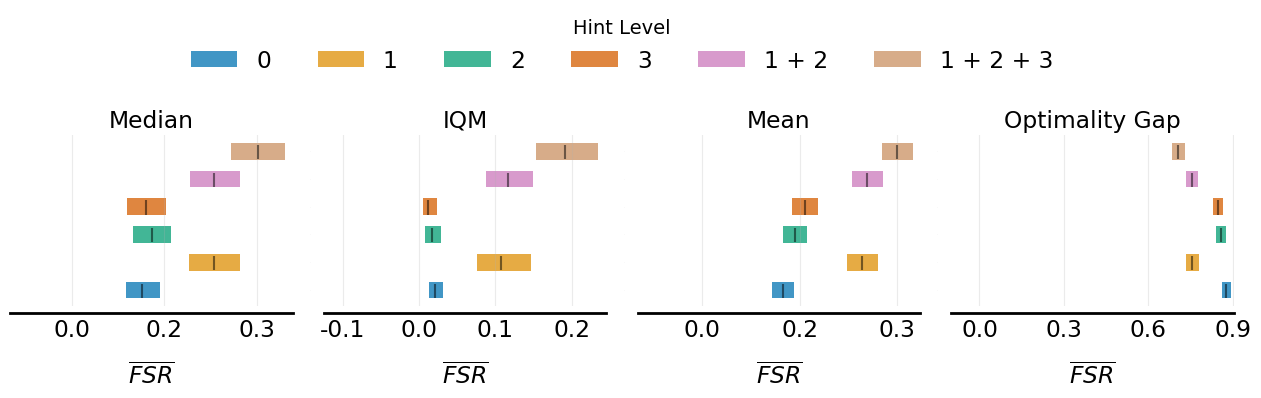

In [47]:
from matplotlib.ticker import FuncFormatter

# Define a formatter to reduce the number of decimal digits
formatter = FuncFormatter(lambda x, _: f'{x:.1f}')

# fig, axes = plot_utils.plot_interval_estimates(
fig, axes = plot_interval_estimates(
    aggregate_scores_hints, aggregate_score_cis_hints,
    metric_names=['Median', 'IQM', 'Mean', 'Optimality Gap'],
    algorithms=searches, legend_name=[item.replace('Level ', '') for item in searches], xlabel='', legend_title='Hint Level',)

# Apply the formatter to all x-axes
for ax in axes:
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlim(left=-0.1)  # Set the x-axis to start from -0.

    # Adjust the position and font size of the xlabel for the IQM plot to avoid overlap
    ax.set_xlabel('$\overline{FSR}$', labelpad=15, fontsize='large')  # Increase labelpad and fontsize
# plt.show()
plt.savefig('figures/o3_mini_hint.pdf', dpi=200, bbox_inches='tight')

In [51]:
results_by_config_searches = {}
for search_method in ['flat', 'tree', 'forest', 'ori_aide', 'multi_aide']:

    key_suffix = f"{search_method}_all_model"
    combined_exp_values = []
    for model in ['deepseek-r1', 'o3-mini', 'gemini-2.5-pro']:
        for hint_regime in ['z', '1', '2', '5', '12', '125']:
            key = f"{search_method}_{hint_regime}_{model}"
            if key in results_by_config:
                combined_exp_values.append(results_by_config[key]['all_exp_values'])

    # Combine all experiments across hint regimes
    combined_exp_values = np.vstack(combined_exp_values)
    results_by_config_searches[f"{search_method}_all_model_all_hints"] = {
        'all_exp_values': combined_exp_values
    }

In [52]:
results_by_config_searches.keys()

dict_keys(['flat_all_model_all_hints', 'tree_all_model_all_hints', 'forest_all_model_all_hints', 'ori_aide_all_model_all_hints', 'multi_aide_all_model_all_hints'])

In [54]:
results_by_config_searches['flat_all_model_all_hints']['all_exp_values'].shape

(320, 3)

In [55]:
searches = [
  'flat_o3-mini_all_hints',
  'tree_o3-mini_all_hints',
  'forest_o3-mini_all_hints',
  'ori_aide_o3-mini_all_hints',
  'multi_aide_o3-mini_all_hints'
  ]
searches_fsr_all_exp_values_dict = {key: value['all_exp_values'] for key, value in results_by_config_searches.items()}
aggregate_func = lambda x: np.array([
  metrics.aggregate_median(x),
  metrics.aggregate_iqm(x),
  metrics.aggregate_mean(x),
  metrics.aggregate_optimality_gap(x)])

In [56]:
searches_fsr_all_exp_values_dict.keys()

dict_keys(['flat_all_model_all_hints', 'tree_all_model_all_hints', 'forest_all_model_all_hints', 'ori_aide_all_model_all_hints', 'multi_aide_all_model_all_hints'])

In [58]:
aggregate_scores_searches, aggregate_score_cis_searches = rly.get_interval_estimates(
  searches_fsr_all_exp_values_dict, aggregate_func, reps=50000)


INFO:absl:Calculating estimates for flat_all_model_all_hints ...
INFO:absl:Calculating estimates for tree_all_model_all_hints ...
INFO:absl:Calculating estimates for forest_all_model_all_hints ...
INFO:absl:Calculating estimates for ori_aide_all_model_all_hints ...
INFO:absl:Calculating estimates for multi_aide_all_model_all_hints ...


In [59]:
aggregate_scores_searches, aggregate_score_cis_searches

({'flat_all_model_all_hints': array([0.17378548, 0.05168017, 0.19745143, 0.80921542]),
  'tree_all_model_all_hints': array([0.16747262, 0.0325583 , 0.1894838 , 0.81370812]),
  'forest_all_model_all_hints': array([0.19874768, 0.05118081, 0.21405248, 0.78996   ]),
  'ori_aide_all_model_all_hints': array([0.16730906, 0.02260863, 0.18768457, 0.81729497]),
  'multi_aide_all_model_all_hints': array([0.22929819, 0.07985854, 0.23196817, 0.77142338])},
 {'flat_all_model_all_hints': array([[0.14189436, 0.03903645, 0.178098  , 0.7907348 ],
         [0.20707716, 0.06648951, 0.21754321, 0.82712245]]),
  'tree_all_model_all_hints': array([[0.1353141 , 0.0207611 , 0.17000885, 0.7945002 ],
         [0.20128871, 0.04655372, 0.20929259, 0.83255498]]),
  'forest_all_model_all_hints': array([[0.16411215, 0.03603022, 0.19370376, 0.76989114],
         [0.23553201, 0.06840788, 0.2347105 , 0.80966452]]),
  'ori_aide_all_model_all_hints': array([[0.13434492, 0.01149501, 0.16749131, 0.79765923],
         [0.201

In [61]:
# hints = [
#     'flat_o3-mini_all_hints', 'tree_o3-mini_all_hints', 'forest_o3-mini_all_hints', 'ori_aide_o3-mini_all_hints', 'multi_aide_o3-mini_all_hints']
hints = ['Flat', 'Tree', 'Forest', 'AIDE', 'MultiAIDE']
hints_replace = {
    'flat_all_model_all_hints': 'Flat',
    'tree_all_model_all_hints': 'Tree',
    'forest_all_model_all_hints': 'Forest',
    'ori_aide_all_model_all_hints': 'AIDE',
    'multi_aide_all_model_all_hints': 'MultiAIDE',
}
aggregate_scores_searches = {hints_replace[k]: v for k, v in aggregate_scores_searches.items()}
aggregate_score_cis_searches = {hints_replace[k]: v for k, v in aggregate_score_cis_searches.items()}

<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_1309374/1815653806.py:18: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('$\overline{FSR}$', labelpad=15, fontsize='large')  # Increase labelpad and fontsize


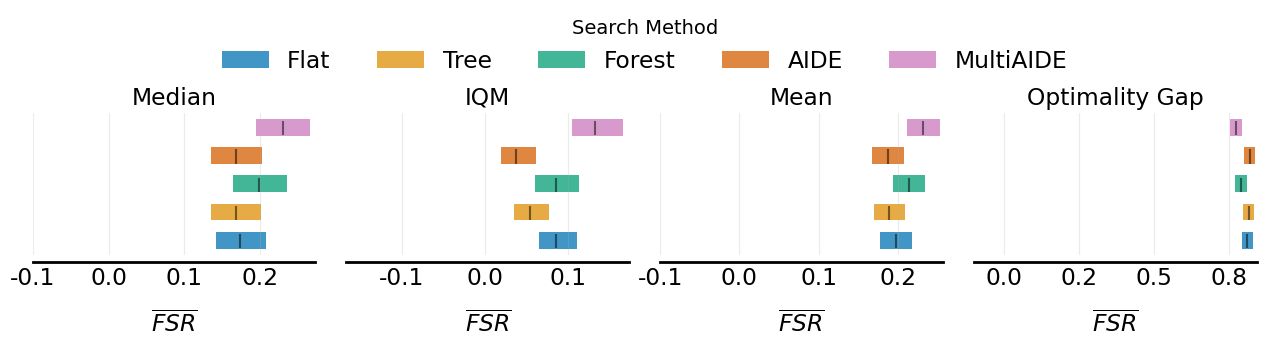

In [62]:
from matplotlib.ticker import FuncFormatter

# Define a formatter to reduce the number of decimal digits
formatter = FuncFormatter(lambda x, _: f'{x:.1f}')

# fig, axes = plot_utils.plot_interval_estimates(
fig, axes = plot_interval_estimates(
    aggregate_scores_searches, aggregate_score_cis_searches,
    metric_names=['Median', 'IQM', 'Mean', 'Optimality Gap'],
    algorithms=hints, legend_name=hints, legend_title='Search Method', xlabel='',)

# Apply the formatter to all x-axes
for ax in axes:
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlim(left=-0.1)  # Set the x-axis to start from -0.

    # Adjust the position and font size of the xlabel for the IQM plot to avoid overlap
    ax.set_xlabel('$\overline{FSR}$', labelpad=15, fontsize='large')  # Increase labelpad and fontsize
# plt.show()
plt.savefig('figures/o3_mini_search.pdf', dpi=200, bbox_inches='tight')

In [63]:
results_by_config_models = {}
for model in ['deepseek-r1', 'o3-mini', 'gemini-2.5-pro']:

    key_suffix = f"{model}_all_searches"
    combined_exp_values = []
    for search_method in ['flat', 'tree', 'forest', 'ori_aide', 'multi_aide']:
        for hint_regime in ['z', '1', '2', '5', '12', '125']:
            key = f"{search_method}_{hint_regime}_{model}"
            if key in results_by_config:
                combined_exp_values.append(results_by_config[key]['all_exp_values'])

    # Combine all experiments across hint regimes
    combined_exp_values = np.vstack(combined_exp_values)
    results_by_config_models[f'{key_suffix}_all_hint'] = {
        'all_exp_values': combined_exp_values
    }

In [67]:
results_by_config_models['deepseek-r1_all_searches_all_hint']['all_exp_values'].shape

(531, 3)

In [68]:
searches_fsr_all_exp_values_dict = {key: value['all_exp_values'] for key, value in results_by_config_models.items()}
aggregate_func = lambda x: np.array([
  metrics.aggregate_median(x),
  metrics.aggregate_iqm(x),
  metrics.aggregate_mean(x),
  metrics.aggregate_optimality_gap(x)])

In [72]:
aggregate_scores_models, aggregate_score_cis_models = rly.get_interval_estimates(
  searches_fsr_all_exp_values_dict, aggregate_func, reps=50000)

INFO:absl:Calculating estimates for deepseek-r1_all_searches_all_hint ...
INFO:absl:Calculating estimates for o3-mini_all_searches_all_hint ...
INFO:absl:Calculating estimates for gemini-2.5-pro_all_searches_all_hint ...


In [73]:
models_replace = {
    'deepseek-r1_all_searches_all_hint': 'DeepSeek-R1',
    'o3-mini_all_searches_all_hint': 'o3-mini',
    'gemini-2.5-pro_all_searches_all_hint': 'Gemini-2.5-Pro',
}
models = ['DeepSeek-R1', 'o3-mini', 'Gemini-2.5-Pro']
aggregate_scores_models = {models_replace[k]: v for k, v in aggregate_scores_models.items()}
aggregate_score_cis_models = {models_replace[k]: v for k, v in aggregate_score_cis_models.items()}

<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_1309374/2582598701.py:18: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('$\overline{FSR}$', labelpad=15, fontsize='large')  # Increase labelpad and fontsize


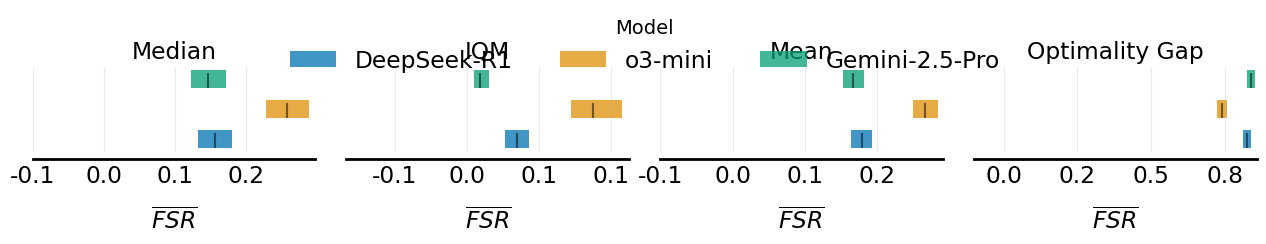

In [76]:
from matplotlib.ticker import FuncFormatter

# Define a formatter to reduce the number of decimal digits
formatter = FuncFormatter(lambda x, _: f'{x:.1f}')

# fig, axes = plot_utils.plot_interval_estimates(
fig, axes = plot_interval_estimates(
    aggregate_scores_models, aggregate_score_cis_models,
    metric_names=['Median', 'IQM', 'Mean', 'Optimality Gap'],
    algorithms=models, legend_name=models, legend_title='Model', xlabel='',)

# Apply the formatter to all x-axes
for ax in axes:
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlim(left=-0.1)  # Set the x-axis to start from -0.

    # Adjust the position and font size of the xlabel for the IQM plot to avoid overlap
    ax.set_xlabel('$\overline{FSR}$', labelpad=15, fontsize='large')  # Increase labelpad and fontsize
# plt.show()
plt.savefig('figures/o3_mini_search.pdf', dpi=200, bbox_inches='tight')

In [80]:
# Median, IQM, Mean, Optimality Gap
aggregate_scores_hints, aggregate_scores_searches, aggregate_scores_models,
aggregate_score_cis_hints, aggregate_score_cis_searches, aggregate_score_cis_models;

In [83]:
searches = aggregate_scores_searches.keys()
hints = aggregate_scores_hints.keys()
models = aggregate_scores_models.keys()

In [84]:
searches, hints, models

(dict_keys(['Flat', 'Tree', 'Forest', 'AIDE', 'MultiAIDE']),
 dict_keys(['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 1 + 2', 'Level 1 + 2 + 3']),
 dict_keys(['DeepSeek-R1', 'o3-mini', 'Gemini-2.5-Pro']))

<>:55: SyntaxWarning: invalid escape sequence '\o'
<>:55: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_1309374/3689415902.py:55: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('$\overline{FSR}$', labelpad=15, fontsize='large')


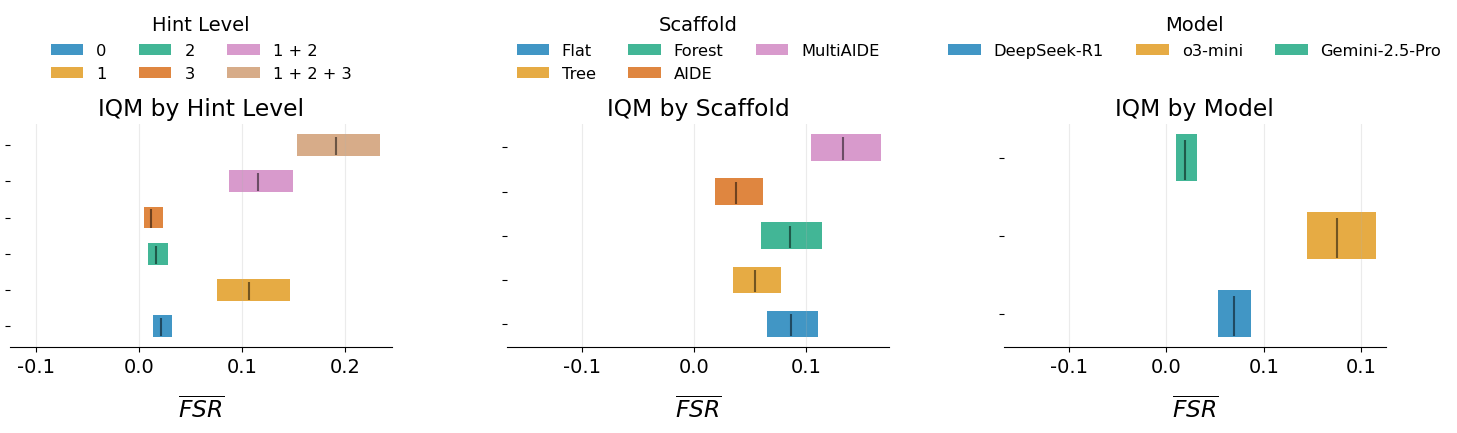

In [91]:
from matplotlib.ticker import FuncFormatter

def plot_iqm_comparison(ax, algorithms, aggregate_scores, aggregate_score_cis,
                       colors, title, legend_title, label_formatter=None):
    """
    Plot IQM comparison on a given axis.

    Parameters:
    - ax: matplotlib axis object
    - algorithms: list of algorithm names
    - aggregate_scores: dict of scores for each algorithm
    - aggregate_score_cis: dict of confidence intervals for each algorithm
    - colors: color palette for the bars
    - title: title for the subplot
    - legend_title: title for the legend
    - label_formatter: optional function to format legend labels
    """
    h = 0.6  # interval height

    # Extract only IQM metric (index 1)
    iqm_scores = {}
    iqm_cis = {}
    for alg in algorithms:
        iqm_scores[alg] = [aggregate_scores[alg][1]]  # IQM is at index 1
        iqm_cis[alg] = aggregate_score_cis[alg][:, [1]]  # Extract only IQM column

    # Plot each algorithm
    for alg_idx, algorithm in enumerate(algorithms):
        # Plot interval estimates
        lower, upper = iqm_cis[algorithm][:, 0]
        ax.barh(
            y=alg_idx,
            width=upper - lower,
            height=h,
            left=lower,
            color=colors[alg_idx],
            alpha=0.75,
            label=algorithm if not label_formatter else label_formatter(algorithm))
        # Plot point estimates
        ax.vlines(
            x=iqm_scores[algorithm][0],
            ymin=alg_idx - (7.5 * h / 16),
            ymax=alg_idx + (6 * h / 16),
            color='k',
            alpha=0.5)

    # Configure axis
    formatter = FuncFormatter(lambda x, _: f'{x:.1f}')
    ax.set_yticks(list(range(len(algorithms))))
    ax.set_yticklabels([])
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlim(left=-0.1)
    ax.set_title(title, fontsize='large')
    ax.set_xlabel('$\overline{FSR}$', labelpad=15, fontsize='large')
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, axis='x', alpha=0.25)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title=legend_title,
              bbox_to_anchor=(0.5, 1.55), loc='upper center',
              frameon=False, ncol=min(3, len(algorithms)), fontsize='small')

# Label formatter functions
def format_search_labels(label):
    return label.replace('Level ', '')

def format_model_labels(label):
    model_map = {
        'gemini-2.5-pro': 'Gemini-2.5-Pro',
        'o3-mini': 'o3-mini',
        'deepseek-r1': 'DeepSeek-R1'
    }
    return model_map.get(label, label)

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Get models list
models = list(aggregate_scores_models.keys())

# Create color palettes
colors_hints = sns.color_palette('colorblind', n_colors=len(hints))
colors_searches = sns.color_palette('colorblind', n_colors=len(searches))
colors_models = sns.color_palette('colorblind', n_colors=len(models))

# Plot all three comparisons
plot_iqm_comparison(ax1, hints, aggregate_scores_hints, aggregate_score_cis_hints,
                   colors_hints, 'IQM by Hint Level', 'Hint Level',
                   label_formatter=format_search_labels)

plot_iqm_comparison(ax2, searches, aggregate_scores_searches, aggregate_score_cis_searches,
                   colors_searches, 'IQM by Scaffold', 'Scaffold',
                   label_formatter=format_search_labels)

plot_iqm_comparison(ax3, models, aggregate_scores_models, aggregate_score_cis_models,
                   colors_models, 'IQM by Model', 'Model',
                   label_formatter=format_model_labels)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.8, wspace=0.3)

# Save the figure
plt.savefig('figures/iqm_comparison_hints_searches_models.pdf', dpi=200, bbox_inches='tight')

In [89]:
aggregate_scores_searches

{'Flat': array([0.17378548, 0.05168017, 0.19745143, 0.80921542]),
 'Tree': array([0.16747262, 0.0325583 , 0.1894838 , 0.81370812]),
 'Forest': array([0.19874768, 0.05118081, 0.21405248, 0.78996   ]),
 'AIDE': array([0.16730906, 0.02260863, 0.18768457, 0.81729497]),
 'MultiAIDE': array([0.22929819, 0.07985854, 0.23196817, 0.77142338])}